In [1]:
import ipywidgets as widgets
from IPython.display import display

import pandas as pd
import numpy as np

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns

# Startup Investments

**Developers**: James Geronimo, Suparna Kompalli

This note is for initial exploration of the Startup Investments data found on Kaggle here: https://www.kaggle.com/datasets/justinas/startup-investments

In [2]:
# load acquisitions data
acquisitions = pd.read_csv("acquisitions.csv")

# drop unnecessary columns
acquisitions.drop(columns=[
    'id', 'acquisition_id', 'created_at', 'updated_at', 
    'source_url', 'source_description'
], inplace=True)

# convert columns
acquisitions['term_code'] = acquisitions['term_code'].astype('category')
acquisitions['price_currency_code'] = acquisitions['price_currency_code'].astype('category')
acquisitions['acquired_at'] = pd.to_datetime(acquisitions['acquired_at'])

# remove duplicates
acquisitions = acquisitions.drop_duplicates()
acquisitions.head()

,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at
0,c:11,c:10,NaN,20000000.0,USD,2007-05-30
1,c:59,c:72,cash,60000000.0,USD,2007-07-01
2,c:24,c:132,cash,280000000.0,USD,2007-05-01
3,c:59,c:155,cash,100000000.0,USD,2007-06-01
4,c:212,c:215,cash,25000000.0,USD,2007-07-01


In [3]:
# load funding_rounds data
funding_rounds = pd.read_csv("funding_rounds.csv")

# drop unnecessary columns
funding_rounds.drop(columns=[
    'id', 'created_at', 'updated_at', 'created_by',
    'raised_amount', 'raised_currency_code', 'pre_money_valuation', 'post_money_valuation_usd',
    'pre_money_currency_code', 'post_money_valuation', 'pre_money_valuation_usd',
    'post_money_currency_code', 'source_url'
], inplace=True)

# convert data types
funding_rounds['funded_at'] = pd.to_datetime(funding_rounds['funded_at'])
categorical_cols = ['funding_round_type', 'funding_round_code', 'is_first_round', 'is_last_round']
for col in categorical_cols:
    funding_rounds[col] = funding_rounds[col].astype('category')

# fix funding round type inconsistencies
condition = (funding_rounds['funding_round_code'] == "angel") & (funding_rounds['funding_round_type'] == "series-a")
funding_rounds.loc[condition, 'funding_round_type'] = "angel"
funding_rounds.head()

,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,participants,is_first_round,is_last_round,source_description
0,1,c:4,2006-12-01,series-b,b,8500000.0,2,0,0,NaN
1,2,c:5,2004-09-01,angel,angel,500000.0,2,0,1,NaN
2,3,c:5,2005-05-01,series-a,a,12700000.0,3,0,0,Jim Breyer: Extra $500 Million Round For Faceb...
3,4,c:5,2006-04-01,series-b,b,27500000.0,4,0,0,Facebook Funding
4,5,c:7299,2006-05-01,series-b,b,10500000.0,2,0,0,PhotoBucket Closes $10.5M From Trinity Ventures


In [4]:
# load investments data
investments = pd.read_csv("investments.csv")
investments.drop(columns=['id', 'created_at', 'updated_at'], inplace=True)
investments = investments.drop_duplicates()
investments.head()

,funding_round_id,funded_object_id,investor_object_id
0,1,c:4,f:1
1,1,c:4,f:2
2,3,c:5,f:4
3,4,c:5,f:1
4,4,c:5,f:5


In [5]:
# load IPOs data
ipos = pd.read_csv("ipos.csv")
ipos.drop(columns=[
    'id', 'created_at', 'updated_at', 'stock_symbol',
    'source_url', 'source_description'
], inplace=True)
ipos['valuation_currency_code'] = ipos['valuation_currency_code'].astype('category')
ipos['raised_currency_code'] = ipos['raised_currency_code'].astype('category')
ipos['public_at'] = pd.to_datetime(ipos['public_at'])
ipos = ipos.drop_duplicates()
ipos.head()

,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at
0,1,c:1654,0.000000e+00,USD,0.0,USD,1980-12-19
1,2,c:1242,0.000000e+00,USD,0.0,NaN,1986-03-13
2,3,c:342,0.000000e+00,USD,0.0,NaN,1969-06-09
3,4,c:59,0.000000e+00,USD,0.0,NaN,2004-08-25
4,5,c:317,1.000000e+11,USD,0.0,NaN,1997-05-01


In [6]:
# load milestones data
milestones = pd.read_csv("milestones.csv")
milestones.drop(columns=[
    'id', 'created_at', 'updated_at', 'source_url', 'milestone_code'
], inplace=True)
milestones['milestone_at'] = pd.to_datetime(milestones['milestone_at'])
milestones = milestones.drop_duplicates()
milestones.head()

,object_id,milestone_at,description,source_description
0,c:12,2008-06-09,Survives iPhone 3G Stevenote,"Twitter Fails To Fail, Community Rejoices"
1,c:3138,2008-06-17,Twhirl announces support for Seesmic video pla...,Seesmic Now Available In Twhirl
2,c:59,2008-06-18,More than 4 Billion videos viewed at Google Si...,11 Billion Videos Viewed Online in the U.S. in...
3,c:314,2008-06-18,Reddit goes Open Source,reddit goes open source
4,c:314,2008-01-22,Adds the ability to create your own Reddits,Reddit Adds Ability to Create Your Own âRedd...


In [7]:
# load objects data
objects = pd.read_csv("objects.csv")
objects.drop(columns=[
    'normalized_name', 'permalink', 'created_at', 'updated_at', 'first_investment_at',
    'last_investment_at', 'created_by', 'domain', 'twitter_username', 'logo_url', 'overview'
], inplace=True)

# convert columns
objects['founded_at'] = pd.to_datetime(objects['founded_at'])
objects['logo_width'] = pd.to_numeric(objects['logo_width'], errors='coerce')
objects['logo_height'] = pd.to_numeric(objects['logo_height'], errors='coerce')
objects['country_code'] = objects['country_code'].astype('category')
objects['state_code'] = objects['state_code'].astype('category')
objects['investment_rounds'] = objects['investment_rounds'].astype('Int64')
objects['invested_companies'] = objects['invested_companies'].astype('Int64')
objects['first_funding_at'] = pd.to_datetime(objects['first_funding_at'])
objects['last_funding_at'] = pd.to_datetime(objects['last_funding_at'])
objects['funding_rounds'] = objects['funding_rounds'].astype('Int64')
objects['funding_total_usd'] = pd.to_numeric(objects['funding_total_usd'], errors='coerce')
objects['first_milestone_at'] = pd.to_datetime(objects['first_milestone_at'])
objects['milestones'] = objects['milestones'].astype('Int64')
objects['relationships'] = pd.to_numeric(objects['relationships'], errors='coerce')
objects.head()

C:\Users\jergx\AppData\Local\Temp\ipykernel_21728\2590455922.py:2: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects = pd.read_csv("objects.csv")


,id,entity_type,entity_id,parent_id,name,category_code,status,founded_at,closed_at,homepage_url,...,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,1,NaN,Wetpaint,web,operating,2005-10-17,NaN,http://wetpaint-inc.com,...,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17
1,c:10,Company,10,NaN,Flektor,games_video,acquired,NaT,NaN,http://www.flektor.com,...,0,0,NaT,NaT,0,0.0,NaT,NaN,0,6
2,c:100,Company,100,NaN,There,games_video,acquired,NaT,NaN,http://www.there.com,...,0,0,NaT,NaT,0,0.0,2003-02-01,2011-09-23,4,12
3,c:10000,Company,10000,NaN,MYWEBBO,network_hosting,operating,2008-07-26,NaN,http://www.mywebbo.com,...,0,0,NaT,NaT,0,0.0,NaT,NaN,0,0
4,c:10001,Company,10001,NaN,THE Movie Streamer,games_video,operating,2008-07-26,NaN,http://themoviestreamer.com,...,0,0,NaT,NaT,0,0.0,NaT,NaN,0,0


In [8]:
# load offices data
offices = pd.read_csv("offices.csv")
offices.drop(columns=['id', 'zip_code', 'created_at', 'updated_at'], inplace=True)
offices['state_code'] = offices['state_code'].astype('category')
offices = offices.drop_duplicates()
offices.head()

,object_id,office_id,description,region,address1,address2,city,state_code,country_code,latitude,longitude
0,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,WA,USA,47.603122,-122.333253
1,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,CA,USA,37.692934,-121.904945
2,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,CA,USA,37.764726,-122.394523
3,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,CA,USA,37.416050,-122.151801
4,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,CA,ISR,0.000000,0.000000


In [9]:
# load people data
people = pd.read_csv("people.csv")
people.drop(columns=['id'], inplace=True)
people = people.drop_duplicates()
people.head()

,object_id,first_name,last_name,birthplace,affiliation_name
0,p:2,Ben,Elowitz,NaN,Blue Nile
1,p:3,Kevin,Flaherty,NaN,Wetpaint
2,p:4,Raju,Vegesna,NaN,Zoho
3,p:5,Ian,Wenig,NaN,Zoho
4,p:6,Kevin,Rose,"Redding, CA",i/o Ventures


In [10]:
# filter objects to create STARTUPS
STARTUPS = objects[(objects['entity_type'] == "Company") & 
                   (objects['status'] != "") & 
                   (objects['country_code'] != "CSS") & 
                   (objects['country_code'] != "FST")].copy()

# drop the 'entity_id' column and remove duplicates
STARTUPS.drop(columns=['entity_id'], inplace=True, errors='ignore')
STARTUPS = STARTUPS.drop_duplicates()
STARTUPS.head()

,id,entity_type,parent_id,name,category_code,status,founded_at,closed_at,homepage_url,logo_width,...,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,NaN,Wetpaint,web,operating,2005-10-17,NaN,http://wetpaint-inc.com,401,...,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17
1,c:10,Company,NaN,Flektor,games_video,acquired,NaT,NaN,http://www.flektor.com,186,...,0,0,NaT,NaT,0,0.0,NaT,NaN,0,6
2,c:100,Company,NaN,There,games_video,acquired,NaT,NaN,http://www.there.com,107,...,0,0,NaT,NaT,0,0.0,2003-02-01,2011-09-23,4,12
3,c:10000,Company,NaN,MYWEBBO,network_hosting,operating,2008-07-26,NaN,http://www.mywebbo.com,0,...,0,0,NaT,NaT,0,0.0,NaT,NaN,0,0
4,c:10001,Company,NaN,THE Movie Streamer,games_video,operating,2008-07-26,NaN,http://themoviestreamer.com,200,...,0,0,NaT,NaT,0,0.0,NaT,NaN,0,0


In [11]:
finale = pd.merge(STARTUPS, ipos, left_on="id", right_on="object_id", how="left")

# drop unnecessary columns
finale.drop(columns=[
    'homepage_url', 'parent_id', 'entity_type', 'short_description', 'description',
    'tag_list', 'valuation_amount', 'valuation_currency_code', 'raised_amount',
    'public_at', 'raised_currency_code', 'ipo_id'
], inplace=True, errors='ignore')
finale.head()

,id,name,category_code,status,founded_at,closed_at,logo_width,logo_height,country_code,state_code,...,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,object_id
0,c:1,Wetpaint,web,operating,2005-10-17,NaN,401,54,USA,WA,...,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,NaN
1,c:10,Flektor,games_video,acquired,NaT,NaN,186,85,USA,CA,...,0,NaT,NaT,0,0.0,NaT,NaN,0,6,NaN
2,c:100,There,games_video,acquired,NaT,NaN,107,34,USA,CA,...,0,NaT,NaT,0,0.0,2003-02-01,2011-09-23,4,12,NaN
3,c:10000,MYWEBBO,network_hosting,operating,2008-07-26,NaN,0,0,NaN,NaN,...,0,NaT,NaT,0,0.0,NaT,NaN,0,0,NaN
4,c:10001,THE Movie Streamer,games_video,operating,2008-07-26,NaN,200,74,NaN,NaN,...,0,NaT,NaT,0,0.0,NaT,NaN,0,0,NaN


In [12]:
# merge/filter funding rounds
rounds = pd.merge(finale[['id']], funding_rounds, left_on='id', right_on='object_id', how='left')
rounds = rounds[['id', 'funded_at', 'funding_round_id', 'funding_round_type', 'raised_amount_usd']]
rounds = rounds.dropna(subset=['funding_round_type'])

# group by funding type and aggregate sums
rounds_summary = rounds.groupby('id').apply(lambda df: pd.Series({
    'angel': df.loc[df['funding_round_type'] == 'angel', 'raised_amount_usd'].sum(),
    'crowdfunding': df.loc[df['funding_round_type'] == 'crowdfunding', 'raised_amount_usd'].sum(),
    'other': df.loc[df['funding_round_type'] == 'other', 'raised_amount_usd'].sum(),
    'post_ipo': df.loc[df['funding_round_type'] == 'post-ipo', 'raised_amount_usd'].sum(),
    'private_equity': df.loc[df['funding_round_type'] == 'private_equity', 'raised_amount_usd'].sum(),
    'series_a': df.loc[df['funding_round_type'] == 'series-a', 'raised_amount_usd'].sum(),
    'series_b': df.loc[df['funding_round_type'] == 'series-b', 'raised_amount_usd'].sum(),
    'series_c': df.loc[df['funding_round_type'] == 'series-c+', 'raised_amount_usd'].sum(),
    'venture': df.loc[df['funding_round_type'] == 'venture', 'raised_amount_usd'].sum()
})).reset_index()

# merge funding summaries back
finale = pd.merge(finale, rounds_summary, on='id', how='left')

C:\Users\jergx\AppData\Local\Temp\ipykernel_21728\3210569169.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rounds_summary = rounds.groupby('id').apply(lambda df: pd.Series({


In [13]:
# number of acquisitions made
acq_count = acquisitions.groupby('acquiring_object_id').size().reset_index(name='num_acquisizioni_effettuate')
finale = pd.merge(finale, acq_count, left_on='id', right_on='acquiring_object_id', how='left')
finale['num_acquisizioni_effettuate'] = finale['num_acquisizioni_effettuate'].fillna(0)

# whether the company has been acquired
acquired_flags = acquisitions[['acquired_object_id']].copy()
acquired_flags['have_been_acquired'] = 1
acquired_flags.drop_duplicates(inplace=True)
finale = pd.merge(finale, acquired_flags, left_on='id', right_on='acquired_object_id', how='left')
finale['have_been_acquired'] = finale['have_been_acquired'].fillna(0)

In [14]:
# create FINANCIAL_ORG from objects
FINANCIAL_ORG = objects[objects['entity_type'] == "FinancialOrg"].copy()

FINANCIAL_ORG.drop(columns=[
    'closed_at', 'entity_id', 'parent_id', 'category_code', 
    'status', 'funding_rounds', 'funding_total_usd', 
    'first_funding_at', 'last_funding_at', 'milestones', 
    'last_milestone_at', 'first_milestone_at'
], inplace=True, errors='ignore')

In [15]:
# merge investments with financial organizations
t = pd.merge(investments, FINANCIAL_ORG, left_on='investor_object_id', right_on='id', how='inner')
t = t[['funded_object_id', 'investor_object_id']].groupby('funded_object_id').size().reset_index(name='n')
t['fin_org_financed'] = 1

finale = pd.merge(finale, t[['funded_object_id', 'fin_org_financed']], left_on='id', right_on='funded_object_id', how='left')

In [16]:
# drop unused or redundant columns
finale.drop(columns=[
    'first_milestone_at', 'last_milestone_at', 'last_funding_at',
    'first_funding_at', 'name', 'city', 'region', 'have_been_acquired',
    'closed_at', 'state_code'
], inplace=True, errors='ignore')

# drop duplicates
finale = finale.drop_duplicates()

# convert categorical columns
for col in ['category_code', 'status', 'country_code', 'fin_org_financed', 'person_financed', 'startup_financed']:
    if col in finale.columns:
        finale[col] = finale[col].astype('category')

status
operating    183387
acquired       9393
closed         2584
ipo            1134
Name: count, dtype: int64


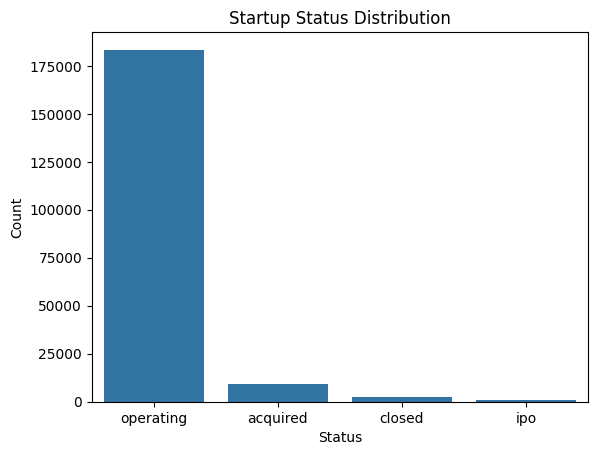

In [17]:
# frequency of each status
status_counts = finale['status'].value_counts()
print(status_counts)

sns.barplot(x=status_counts.index, y=status_counts.values, order=status_counts.index)
plt.title("Startup Status Distribution")
plt.ylabel("Count")
plt.xlabel("Status")
plt.show()

In [18]:
# filter out blank category_code values
status_settore = finale[finale['category_code'].notnull()].copy()

# group and compute metrics by sector
sector_summary = status_settore.groupby('category_code').apply(lambda df: pd.Series({
    'n_acquired': (df['status'] == 'acquired').sum(),
    'n_closed': (df['status'] == 'closed').sum(),
    'n_ipo': (df['status'] == 'ipo').sum(),
    'n_ipo_acquired': (df['status'] == 'ipo&acquired').sum() if 'ipo&acquired' in df['status'].unique() else 0,
    'n_operating': (df['status'] == 'operating').sum(),
    'avg_milestones': df['milestones'].mean(skipna=True),
    'n': df.shape[0]
})).reset_index()

# calculate rates
for status_type in ['acquired', 'closed', 'ipo', 'ipo_acquired', 'operating']:
    rate_col = f"{status_type}_rate"
    count_col = f"n_{status_type}"
    if count_col in sector_summary.columns:
        sector_summary[rate_col] = sector_summary[count_col] / sector_summary['n']

# sort by IPO rate
sector_summary = sector_summary.sort_values(by='ipo_rate', ascending=False)

C:\Users\jergx\AppData\Local\Temp\ipykernel_21728\2191992372.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sector_summary = status_settore.groupby('category_code').apply(lambda df: pd.Series({
C:\Users\jergx\AppData\Local\Temp\ipykernel_21728\2191992372.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sector_summary = status_settore.groupby('category_code').apply(lambda df: pd.Series({


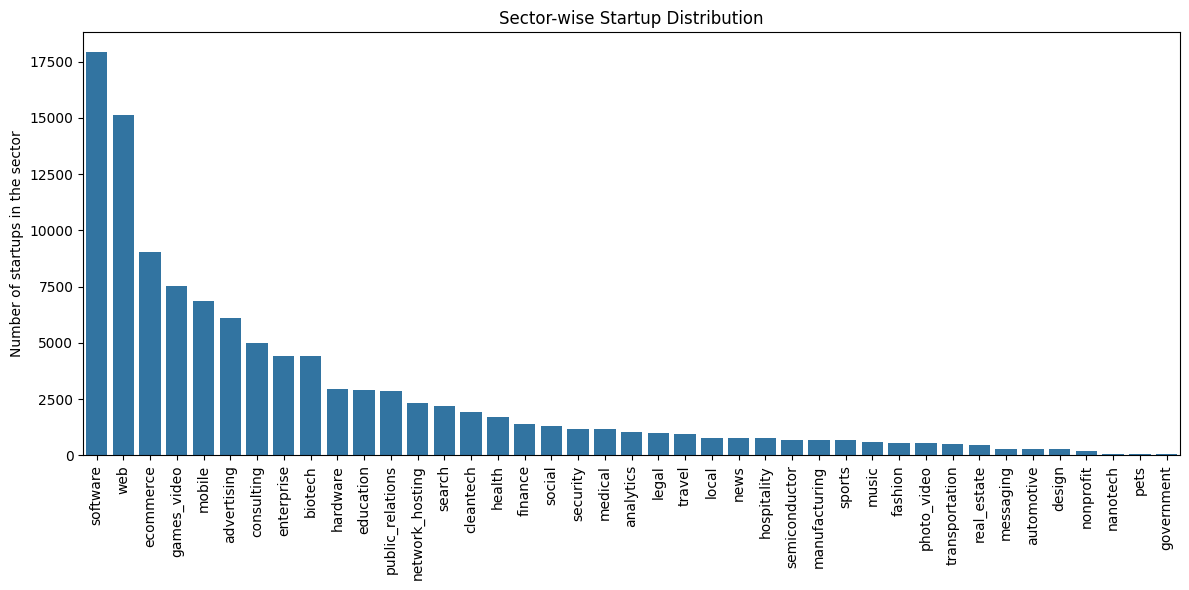

In [19]:
# sort categories by total number of startups and exclude 'other'
filtered = sector_summary[sector_summary['category_code'] != 'other']
filtered = filtered.sort_values(by='n', ascending=False)
filtered['category_code'] = pd.Categorical(filtered['category_code'], categories=filtered['category_code'], ordered=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x='category_code', y='n', order=filtered['category_code'])
plt.xticks(rotation=90)
plt.ylabel("Number of startups in the sector")
plt.xlabel("")
plt.title("Sector-wise Startup Distribution")
plt.tight_layout()
plt.show()

In [20]:
# define options and label mapping
rate_options = {
    'IPO Rate': 'ipo_rate',
    'Acquired Rate': 'acquired_rate',
    'Closed Rate': 'closed_rate',
    'Operating Rate': 'operating_rate'
}

# create button selector
rate_selector = widgets.ToggleButtons(
    options=rate_options.keys(),
    description='Select Rate:',
    button_style='info'
)

# define interactive plotting function
def plot_selected_rate(selected_label):
    rate_col = rate_options[selected_label]
    data_sorted = sector_summary.sort_values(by=rate_col, ascending=False).copy()
    data_sorted['category_code'] = pd.Categorical(data_sorted['category_code'], categories=data_sorted['category_code'], ordered=True)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data_sorted, x='category_code', y=rate_col, order=data_sorted['category_code'])
    plt.title(f"Percentage of Companies by Sector – {selected_label}", fontsize=14)
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

# link the widget to the function
widgets.interact(plot_selected_rate, selected_label=rate_selector)

interactive(children=(ToggleButtons(button_style='info', description='Select Rate:', options=('IPO Rate', 'Acq…

<function __main__.plot_selected_rate(selected_label)>

In [21]:
# merge STARTUPS with office location data
uffici_mappe = pd.merge(STARTUPS[['id', 'status']], offices[['object_id', 'longitude', 'latitude']], 
                        left_on='id', right_on='object_id', how='left')

# drop missing coordinates
uffici_mappe = uffici_mappe.dropna(subset=['longitude', 'latitude'])

# define radius sizes by status
def compute_radius(status):
    return {
        'operating': 100,
        'closed': 2000,
        'acquired': 50000,
        'ipo': 100000
    }.get(status, 500)

uffici_mappe['radius'] = uffici_mappe['status'].apply(compute_radius)

# downsample for performance
sample = uffici_mappe.sample(n=10000, random_state=42)

# map status to colors
color_map = {
    'ipo': 'yellow',
    'closed': 'black',
    'operating': 'blue',
    'acquired': 'red'
}
sample['color'] = sample['status'].map(color_map)

# define zoom presets
zoom_presets = {
    'World': {
        'llcrnrlat': -60, 'urcrnrlat': 85,
        'llcrnrlon': -180, 'urcrnrlon': 180
    },
    'United States': {
        'llcrnrlat': 15, 'urcrnrlat': 55,
        'llcrnrlon': -130, 'urcrnrlon': -60
    },
    'Europe': {
        'llcrnrlat': 30, 'urcrnrlat': 65,
        'llcrnrlon': -25, 'urcrnrlon': 40
    }
}

# define plotting function
def plot_map(region):
    zoom = zoom_presets[region]
    
    plt.figure(figsize=(12, 6))
    m = Basemap(projection='merc',
                resolution='l',
                **zoom)

    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary(fill_color='lightblue')
    m.fillcontinents(color='lightgray', lake_color='lightblue')

    x, y = m(sample['longitude'].values, sample['latitude'].values)
    m.scatter(x, y, s=10, c=sample['color'], alpha=0.6)

    plt.title(f'Startup Office Locations – {region} View', fontsize=15)
    plt.tight_layout()
    plt.show()

# create widget
widgets.interact(plot_map, region=widgets.ToggleButtons(
    options=list(zoom_presets.keys()),
    description='Zoom Region:',
    button_style='info'
))

interactive(children=(ToggleButtons(button_style='info', description='Zoom Region:', options=('World', 'United…

<function __main__.plot_map(region)>

In [22]:
# Group by country and summarize counts
status_paese = STARTUPS.groupby('country_code').apply(lambda df: pd.Series({
    'n': df.shape[0],
    'n_ipo': (df['status'] == 'ipo').sum(),
    'n_operating': (df['status'] == 'operating').sum(),
    'n_closed': (df['status'] == 'closed').sum(),
    'n_acquired': (df['status'] == 'acquired').sum()
})).reset_index()

# Calculate rates
status_paese['ipo_rate'] = (status_paese['n_ipo'] / status_paese['n']) * 100
status_paese['acquired_rate'] = (status_paese['n_acquired'] / status_paese['n']) * 100
status_paese['closed_rate'] = (status_paese['n_closed'] / status_paese['n']) * 100
status_paese['operating_rate'] = (status_paese['n_operating'] / status_paese['n']) * 100

C:\Users\jergx\AppData\Local\Temp\ipykernel_21728\187983125.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_paese = STARTUPS.groupby('country_code').apply(lambda df: pd.Series({
C:\Users\jergx\AppData\Local\Temp\ipykernel_21728\187983125.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  status_paese = STARTUPS.groupby('country_code').apply(lambda df: pd.Series({


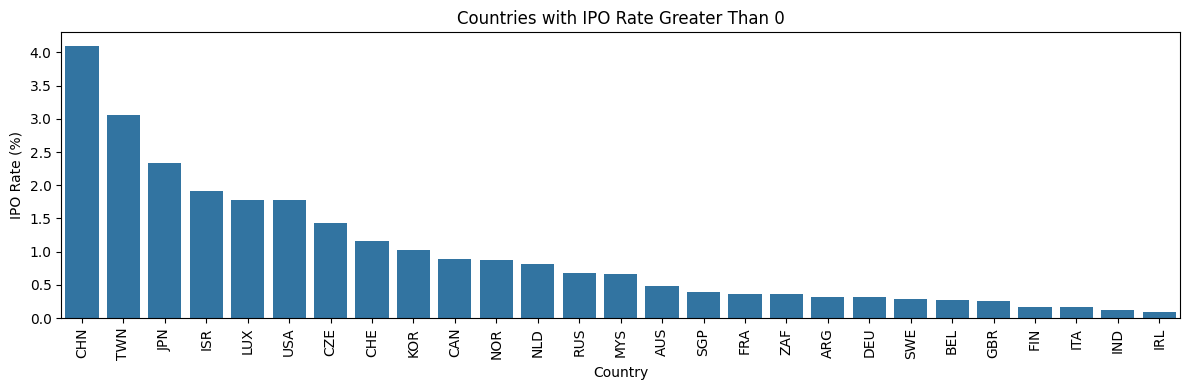

In [23]:
# filter out zero IPO rate countries
nonzero_ipo = status_paese[(status_paese['ipo_rate'] > 0) & (status_paese['ipo_rate'].notnull())].copy()
nonzero_ipo = nonzero_ipo.sort_values(by='ipo_rate', ascending=False)

# set country_code as categorical for proper order
nonzero_ipo['country_code'] = pd.Categorical(
    nonzero_ipo['country_code'],
    categories=nonzero_ipo['country_code'],
    ordered=True
)

# barplot of IPO rate by country
plt.figure(figsize=(12, 4))
sns.barplot(data=nonzero_ipo, x='country_code', y='ipo_rate', order=nonzero_ipo['country_code'])
plt.xticks(rotation=90)
plt.ylabel("IPO Rate (%)")
plt.xlabel("Country")
plt.title("Countries with IPO Rate Greater Than 0")
plt.tight_layout()
plt.show()

Startup Count Summary in Countries with 0 IPOs:
 count     150.00
mean       45.45
std       117.35
min         0.00
25%         1.00
50%         6.50
75%        30.75
max      1100.00
Name: n, dtype: float64


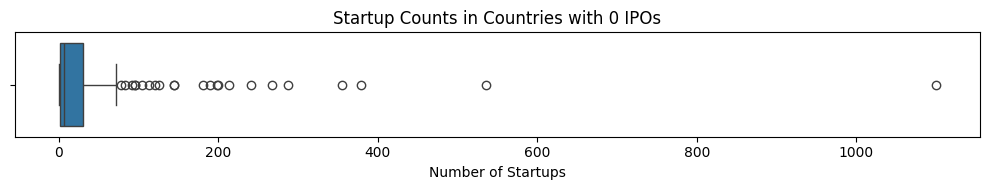

In [24]:
zero_ipo = status_paese[status_paese['n_ipo'] == 0].copy()

# summary of number of startups in zero-IPO countries
zero_ipo_n_summary = zero_ipo['n'].describe().round(2)
print("Startup Count Summary in Countries with 0 IPOs:\n", zero_ipo_n_summary)

# boxplot of number of startups in those countries
plt.figure(figsize=(10, 2))
sns.boxplot(x=zero_ipo['n'])
plt.title("Startup Counts in Countries with 0 IPOs")
plt.xlabel("Number of Startups")
plt.tight_layout()
plt.show()

In [25]:
# Filter countries with >125 startups and no IPOs
n_alto_zero_ipo = status_paese[(status_paese['n_ipo'] == 0) & (status_paese['n'] > 125)].copy()
n_alto_zero_ipo = n_alto_zero_ipo.sort_values(by='n', ascending=False)

# Display the DataFrame
n_alto_zero_ipo

,country_code,n,n_ipo,n_operating,n_closed,n_acquired,ipo_rate,acquired_rate,closed_rate,operating_rate
50,ESP,1100,0,1040,26,34,0.0,3.090909,2.363636,94.545455
26,BRA,536,0,501,13,22,0.0,4.104478,2.425373,93.470149
45,DNK,379,0,339,13,27,0.0,7.124011,3.430079,89.445910
158,TUR,355,0,351,1,3,0.0,0.845070,0.281690,98.873239
128,POL,288,0,281,2,5,0.0,1.736111,0.694444,97.569444
66,HKG,267,0,253,9,5,0.0,1.872659,3.370787,94.756554
12,AUT,241,0,219,7,15,0.0,6.224066,2.904564,90.871369
121,NZL,213,0,199,7,7,0.0,3.286385,3.286385,93.427230
131,PRT,200,0,194,1,5,0.0,2.500000,0.500000,97.000000
162,UKR,198,0,198,0,0,0.0,0.000000,0.000000,100.000000


In [26]:
# filter non-null foundation dates and valid statuses
startups_founded = STARTUPS[(STARTUPS['founded_at'].notnull()) & (STARTUPS['status'] != "")]

# get unique statuses with valid 'founded_at' values
valid_statuses = sorted(startups_founded['status'].dropna().unique())

# create dropdown or toggle buttons
status_selector = widgets.ToggleButtons(
    options=valid_statuses,
    description='Select status:',
    button_style='info'
)

# define plotting function
def plot_founded_distribution(selected_status):
    subset = startups_founded[startups_founded['status'] == selected_status]
    plt.figure(figsize=(10, 4))
    sns.histplot(subset['founded_at'], bins=50, kde=True, color='skyblue')
    plt.title(f"Foundation Date Distribution for '{selected_status}' Startups")
    plt.xlabel("Foundation Date")
    plt.ylabel("Density")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# hook widget to function
widgets.interact(plot_founded_distribution, selected_status=status_selector)


interactive(children=(ToggleButtons(button_style='info', description='Select status:', options=('acquired', 'c…

<function __main__.plot_founded_distribution(selected_status)>

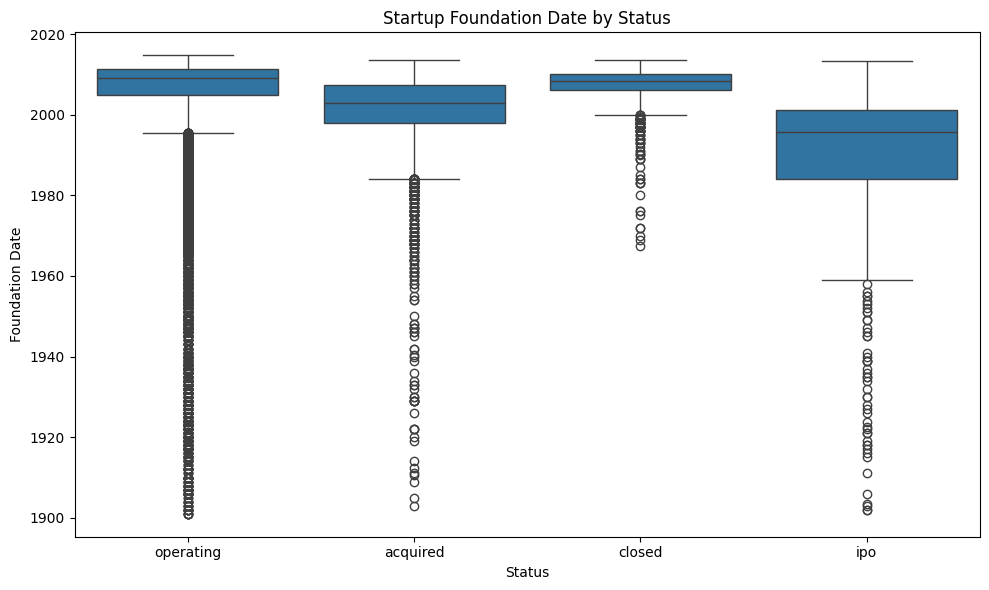

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=startups_founded, x='status', y='founded_at')
plt.xlabel("Status")
plt.ylabel("Foundation Date")
plt.title("Startup Foundation Date by Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

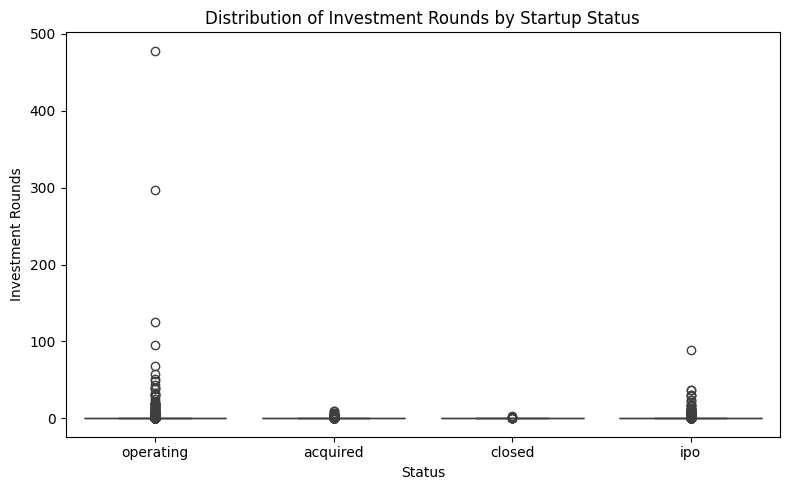

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=STARTUPS, x='status', y='investment_rounds')
plt.xlabel("Status")
plt.ylabel("Investment Rounds")
plt.title("Distribution of Investment Rounds by Startup Status")
plt.tight_layout()
plt.show()

In [29]:
# helper function to get summary stats per group
def round_summary(series):
    return series.describe().round(2)

# compute summaries
summary_stats = pd.DataFrame({
    'IPO': round_summary(STARTUPS.loc[(STARTUPS['status'] == 'ipo') & (STARTUPS['investment_rounds'].notnull()), 'investment_rounds']),
    'Acquired': round_summary(STARTUPS.loc[(STARTUPS['status'] == 'acquired') & (STARTUPS['investment_rounds'].notnull()), 'investment_rounds']),
    'Closed': round_summary(STARTUPS.loc[(STARTUPS['status'] == 'closed') & (STARTUPS['investment_rounds'].notnull()), 'investment_rounds']),
    'Operating': round_summary(STARTUPS.loc[(STARTUPS['status'] == 'operating') & (STARTUPS['investment_rounds'].notnull()), 'investment_rounds'])
})
summary_stats

,IPO,Acquired,Closed,Operating
count,1134.0,9393.0,2584.0,183387.0
mean,0.83,0.02,0.01,0.03
std,4.02,0.26,0.09,1.44
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0
max,89.0,10.0,3.0,478.0


In [30]:
# total startups
total_startups = len(STARTUPS)

# count of startups with 0 investment rounds
zero_rounds = (STARTUPS['investment_rounds'] == 0).sum()

# count with >0
nonzero_rounds = (STARTUPS['investment_rounds'] > 0).sum()

print(f"Startups with 0 investment rounds: {zero_rounds} ({round(zero_rounds / total_startups * 100, 2)}%)")
print(f"Startups with more than 0 investment rounds: {nonzero_rounds} ({round(nonzero_rounds / total_startups * 100, 2)}%)")

Startups with 0 investment rounds: 193907 (98.68%)
Startups with more than 0 investment rounds: 2591 (1.32%)


In [31]:
# filter to startups with >0 investment rounds
filtered_log = STARTUPS[(STARTUPS['investment_rounds'].notnull()) & (STARTUPS['investment_rounds'] > 0)].copy()
filtered_log['log_investment_rounds'] = np.log(filtered_log['investment_rounds'])

# summarize by status
for status in ['ipo', 'acquired', 'closed', 'operating']:
    values = filtered_log.loc[filtered_log['status'] == status, 'log_investment_rounds']
    print(f"\nLog(Investment Rounds) Summary for {status.upper()}:")
    print(values.describe().round(3))


Log(Investment Rounds) Summary for IPO:
count    214.0
mean     0.819
std      0.985
min        0.0
25%        0.0
50%      0.693
75%      1.386
max      4.489
Name: log_investment_rounds, dtype: Float64

Log(Investment Rounds) Summary for ACQUIRED:
count    113.0
mean     0.309
std      0.574
min        0.0
25%        0.0
50%        0.0
75%      0.693
max      2.303
Name: log_investment_rounds, dtype: Float64

Log(Investment Rounds) Summary for CLOSED:
count     11.0
mean     0.163
std      0.374
min        0.0
25%        0.0
50%        0.0
75%        0.0
max      1.099
Name: log_investment_rounds, dtype: Float64

Log(Investment Rounds) Summary for OPERATING:
count    2253.0
mean      0.256
std       0.609
min         0.0
25%         0.0
50%         0.0
75%         0.0
max        6.17
Name: log_investment_rounds, dtype: Float64


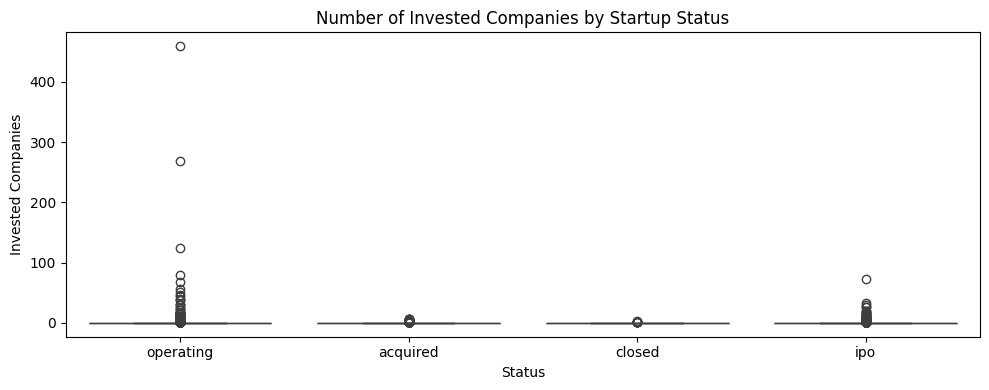

In [32]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=STARTUPS, x='status', y='invested_companies')
plt.title("Number of Invested Companies by Startup Status")
plt.xlabel("Status")
plt.ylabel("Invested Companies")
plt.tight_layout()
plt.show()

In [33]:
# summary stats for invested_companies
for status in ['ipo', 'acquired', 'closed', 'operating']:
    values = STARTUPS.loc[(STARTUPS['status'] == status) & (STARTUPS['invested_companies'].notnull()), 'invested_companies']
    print(f"\nSummary for {status.upper()} (Invested Companies):")
    print(values.describe().round(2))


Summary for IPO (Invested Companies):
count    1134.0
mean       0.71
std        3.32
min         0.0
25%         0.0
50%         0.0
75%         0.0
max        73.0
Name: invested_companies, dtype: Float64

Summary for ACQUIRED (Invested Companies):
count    9393.0
mean       0.02
std        0.21
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         7.0
Name: invested_companies, dtype: Float64

Summary for CLOSED (Invested Companies):
count    2584.0
mean       0.01
std        0.09
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         3.0
Name: invested_companies, dtype: Float64

Summary for OPERATING (Invested Companies):
count    183387.0
mean         0.03
std          1.36
min           0.0
25%           0.0
50%           0.0
75%           0.0
max         459.0
Name: invested_companies, dtype: Float64


In [34]:
# create a contingency table
funding_status_ct = pd.crosstab(STARTUPS['funding_rounds'], STARTUPS['status'])

# ensure all statuses are present (some might be missing in subset)
for col in ['acquired', 'closed', 'ipo', 'operating']:
    if col not in funding_status_ct.columns:
        funding_status_ct[col] = 0

# add totals by row and column
funding_status_ct['tot_funding_rounds'] = funding_status_ct.sum(axis=1)
funding_status_ct.loc['total of status'] = funding_status_ct.sum()

# reorder columns and fill missing values
funding_status_ct = funding_status_ct[['acquired', 'closed', 'ipo', 'operating', 'tot_funding_rounds']]
funding_status_ct = funding_status_ct.fillna(0).astype(int)

funding_status_ct

status,acquired,closed,ipo,operating,tot_funding_rounds
funding_rounds,,,,,
0,6800,495,644,156856,164795
1,1361,1566,230,17373,20530
2,622,362,94,5064,6142
3,347,93,58,2164,2662
4,150,42,33,991,1216
5,58,14,27,501,600
6,26,3,16,204,249
7,17,7,10,113,147
8,7,2,9,49,67


In [ ]:
# list of statuses to choose from
status_options = ['acquired', 'closed', 'ipo', 'operating']

# define button-based interface
buttons = widgets.ToggleButtons(
    options=status_options,
    description='Status:',
    button_style='info',
    style={'description_width': 'initial'}
)

# plotting function
def plot_funding_rounds(selected_status):
    plt.figure(figsize=(10, 4))
    funding_status_ct[selected_status].drop('total of status', errors='ignore').plot(kind='bar')
    plt.title(f"Funding Rounds Distribution - {selected_status.capitalize()}")
    plt.xlabel("Funding Rounds")
    plt.ylabel("Number of Startups")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# Link widget to plotting function
widgets.interact(plot_funding_rounds, selected_status=buttons)

interactive(children=(ToggleButtons(button_style='info', description='Status:', options=('acquired', 'closed',…

<function __main__.plot_funding_rounds(selected_status)>